<a href="https://colab.research.google.com/github/darshandahal/MachineLearning/blob/main/Project_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Go to the following notebook and copy it on your drive and apply necessary ML algorithm for given dataset. Evaluate the model using one feature and multiple feature. Use feature selection technique to select one feature.

In [ ]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 20.9MB/s]


In [ ]:
# loading data to pandas dataframe
import pandas as pd
df = pd.read_csv("/content/ads.csv")

In [ ]:
# first five rows of dataset
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# last five rows of dataset
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.shape

(200, 5)

The dataset contain 200 rows and 5 columns

# Detecting missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


It seems that there is no any missing values

In [ ]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Linear Regression

In [ ]:
# List all columns names in dataframe
df.columns.tolist()

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

In [ ]:
df.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In this dataframe the target column is sales and rest are independent features. It seems that the column "unnamed" is nothing but index and it doesn't effect the target column. so we drop that column

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

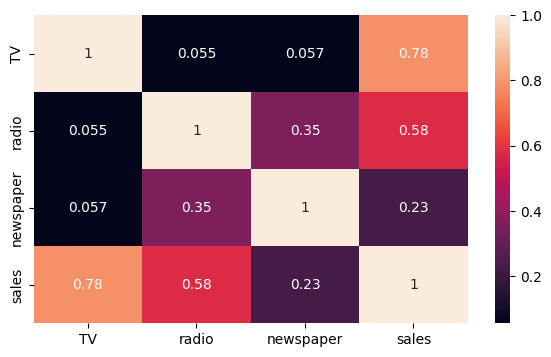

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot = True)

# Independent variable and Dependent variable


* Dependent Variable = sales
* Independent Variables = TV, radio, newspaper


sales is continuous data so should fit linear regression line.

Since TV, radio and newspaper are +ve ly correlated we can use newspaper, radio to predict sales. Additionally we can also use TV to predict sales because the correlation value is 0.78.

We will use TV to predict sales. This is called Feature selection using correlation value.

In [ ]:
X = df[['TV']]
y = df.sales

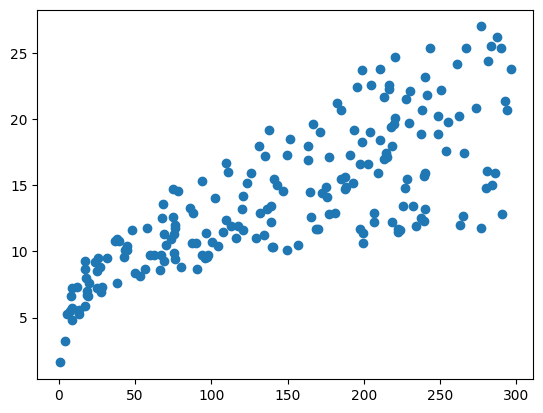

In [ ]:
# Plot the relation between X and y

plt.scatter(x= X, y=y)

# Splittind the data into Training Data and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
X.shape

(200, 1)

In [ ]:
X_train.shape

(140, 1)

In [ ]:
X_test.shape

(60, 1)

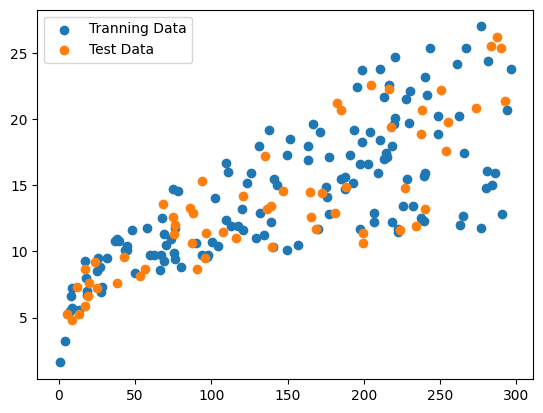

In [ ]:
plt.scatter(x= X_train, y=y_train, label="Tranning Data")
plt.scatter(x= X_test, y= y_test, label = 'Test Data')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

In [ ]:
MSE

8.980732732735273

In [ ]:
MAE

2.4022173325407974

In [ ]:
m = model.coef_
c = model.intercept_

In [ ]:
m

array([0.04515887])

In [ ]:
c

7.402373116656094

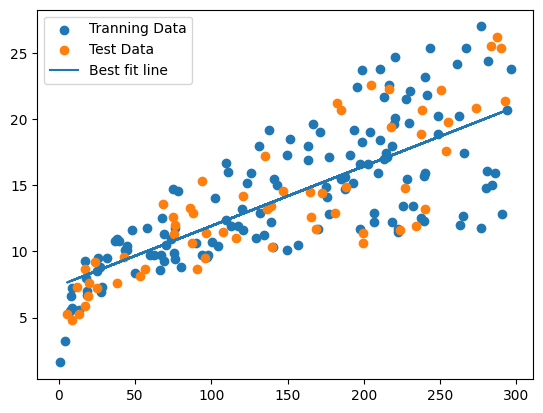

In [ ]:
plt.scatter(x=X_train, y=y_train, label='Tranning Data')
plt.scatter(x=X_test, y=y_test, label= 'Test Data')
plt.plot(X_test, y_pred, label='Best fit line')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6975440571961907

In [ ]:
model.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.91826009])

# Multiple Feature

In [ ]:
X = df[['TV', 'radio', 'newspaper']]
y = df[['sales']]

# Splitting data into tranning data and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_test,y_pred)

48.90696161815874

In [ ]:
mean_absolute_error(y_test, y_pred)

5.521111014577016

In [ ]:
TV = 259
radio = 500
newspaper = 560
sales = model2.predict([[TV, radio, newspaper]])
sales

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[110.73388633]])